### Table of Contents

* [Introduction](#introduction)
* [Chapter 1: relevant variables](#chapter1)
    * [Section 1.1](#c1s1)
    * [Section 1.2](#c1s2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2: Adding Columns](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)
* [Chapter 3: Preparing Data](#chapter3)
    * [Section 3.1](#sinusoids)

## Introduction to the Project <a class='anchor' id='introduction'></a>
This project aims to use a machine learning algorithm to predict the energy usage in the UK based on historical data. 

I have the energy usage data already, which obviously I need to look through to get an understanding of. In fact, I will go and do this now. 
It comes from this website: 
https://data.nationalgrideso.com/demand/historic-demand-data
The Data I am using is from the National Grid and is described as:

The Initial National Demand Out-Turn is the average megawatt value of demand for a Settlement Period INCLUDING transmission losses but EXCLUDING station transformer load, pumped storage demand and interconnector demand. It is given in MegaWatts.

* The data described above is the demand from the grid. Solar energy seems to be distributed on a local level, meaning it is either consumed by whoever produces it or it goes onto a local system. This should mean that sunny days equate to less demand from the grid, although not energy consumption, it still gives me something interesting to work on. 
* Temperature. It should be fairly simple to get an average nationwide temperature reading to mash onto my current data set. This is purely electricity so I dont know if a cold day means more electricity use but its quite possible. 

* Public Holidays- One of the things I want to look at is how things such as public holidays effect energy consumption. I already saw from my first data analysis that there is a large drop in consumption on weekends but I dont know how it will work on public holidays. Maybe it would be interesting to be ble to take into account other inmportant everns, I dont know what like really, so far all I have thought of is a big football match. 
* The price of energy?? Do short term changes in energy prices, if these even exist, change things? I think it might be related in some way    I am not quite sure how batteries and energy saving will affect things.
* school holidays? need to take this into account surely 
* COVID!! currrently I am working with the 2020 data set and thats probably not a good idea. 
* A thought it that I will be training my data at a time when there were less solar and wind generators available. If i can have a column which takes in to account the available power generations from these sources that would be great. 
* I just had a look at when the may bank holidays are and there is a weird pattern that emerges in the rest of the week after the mondays. Have a look at this please callo. 
* Populations?

All these factors above are the independent variables that I want to include in my data set before applying the algorithm, so I need to source them and get them into a workable form. 
For example, I hope to take data sets from the Centre of Environment Data and Atmosphere and uuse this in training a machine learning model. https://data.ceda.ac.uk/badc/ukmo-midas-open/data/uk-radiation-obs/dataset-version-202107/aberdeenshire/00161_dyce/qc-version-1 
Additional information came from:https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment\_data/file/295225/Seasonal\_variations\_in\_electricity\_demand.pdf


## More information about the Dataset!
The values gievn are for the mean average over the half hour time periods. They are identified by the settlement period, for example 1 is the 0:00 to 0:30 time of the given date.

To work out which time the settlement times refers to, use the T=(ST-1)/2, for example, settlement time 1 is 1-1/2=0, whereas settlement time 4 is 1.30. I think it will be interesting to look at how the energy use ranges for a specific time of the day, once the energy through solar and wind has been taken account of. If I want to look at the 7pm (19:00) energy usages for the data set we need settlement time 39. 

### Embedded Generation 

## Chapter 1: Figuring out my variables <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup as bS
from matplotlib import pyplot as plt
%matplotlib inline

### How does energy demand change, looking at the main data set<a class='anchor' id='c1s1'></a>

In [52]:
file=pd.read_csv('data/demanddata_2019.csv')
uw=file.columns[9:].tolist()
file.drop(uw, axis=1, inplace=True)
x=50
pd.set_option('display.max_rows', x)
print(file.head(x))
print(file.loc[file['ND']==file['ND'].min(), 'SETTLEMENT_DATE'])

   SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  ENGLAND_WALES_DEMAND  \
0      01-JAN-2019                  1  23808  25291                 22393   
1      01-JAN-2019                  2  24402  25720                 22962   
2      01-JAN-2019                  3  24147  25495                 22689   
3      01-JAN-2019                  4  23197  24590                 21849   
4      01-JAN-2019                  5  22316  24346                 20979   
5      01-JAN-2019                  6  21987  24414                 20583   
6      01-JAN-2019                  7  20958  23695                 19433   
7      01-JAN-2019                  8  20640  23398                 18988   
8      01-JAN-2019                  9  20331  23080                 18687   
9      01-JAN-2019                 10  20095  22835                 18509   
10     01-JAN-2019                 11  20138  22624                 18525   
11     01-JAN-2019                 12  20404  22815                 18757   

,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY
0,01-JAN-2019,1,23808,25291,22393,2548,5918,0,13052
1,01-JAN-2019,2,24402,25720,22962,2475,5918,0,13052
2,01-JAN-2019,3,24147,25495,22689,2396,5918,0,13052
3,01-JAN-2019,4,23197,24590,21849,2317,5918,0,13052
4,01-JAN-2019,5,22316,24346,20979,2236,5918,0,13052


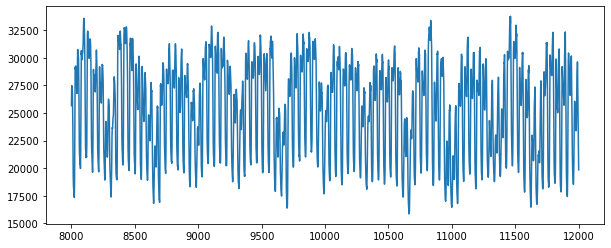

In [46]:
file2=file.copy()
#file=file.head(int(3920/5))
file2=file2.loc[8000:12000, :]
#print(file2)
#print(file['ND'])
#print(file.index.tolist())
plt.figure(figsize=(10,4))
plt.plot(file2.index, file2['ND'])
#file=file.iloc[1:, :]
file.head()

Text(0.5, 1.0, 'Combined with Embedded Generation Estimates')

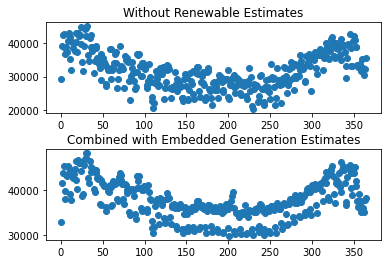

<Figure size 1440x1296 with 0 Axes>

In [47]:
file3=file.copy()
file3=file3.loc[file['SETTLEMENT_PERIOD']==24, :]
#print(file3)
fig, (ax1, ax2)=plt.subplots(2,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
plt.figure(figsize=(20,18))
toplot= file3['ND']+ file3['EMBEDDED_WIND_GENERATION']+ file3['EMBEDDED_SOLAR_GENERATION']
ax1.scatter(file3.index/48, file3['ND'])
ax2.scatter(file3.index/48, toplot)
ax1.set_title("Without Renewable Estimates")
ax2.set_title("Combined with Embedded Generation Estimates")


I have been isolated 19:00 in the month of may. It seems like wednesday is the day with the highest usage of energy for some reason. To verifiy this I am going to have to split the month up into its individual weeks and then plot them separately. 

6996    26-MAY-2019
6948    25-MAY-2019
6612    18-MAY-2019
7044    27-MAY-2019
6660    19-MAY-2019
Name: SETTLEMENT_DATE, dtype: object


A:\Anaconda\envs\test\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


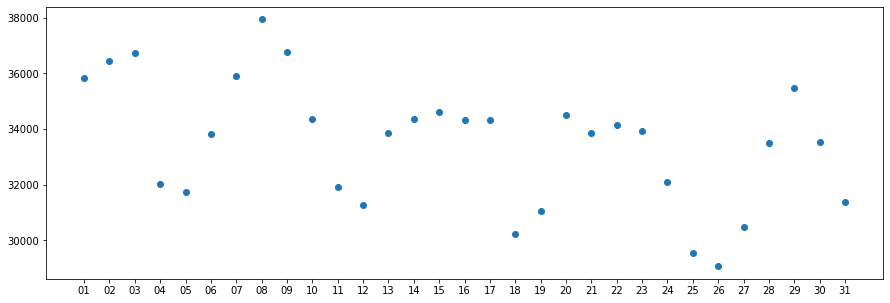

In [9]:
may7pm=file.loc[(file['SETTLEMENT_PERIOD']==39) & (file['SETTLEMENT_DATE'].str.contains('MAY')), :]
#print(may7pm)
#file['SETTLEMENT_PERIOD']==39
toplot= may7pm['ND']+ may7pm['EMBEDDED_WIND_GENERATION']+ may7pm['EMBEDDED_SOLAR_GENERATION']
may7pm['toplot']=toplot
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.scatter(may7pm['SETTLEMENT_DATE'].str[0:2], toplot)
#print(may7pm['toplot'])
may7pm=may7pm.sort_values('toplot')
print(may7pm.loc[:,'SETTLEMENT_DATE'].head(5))

A:\Anaconda\envs\test\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


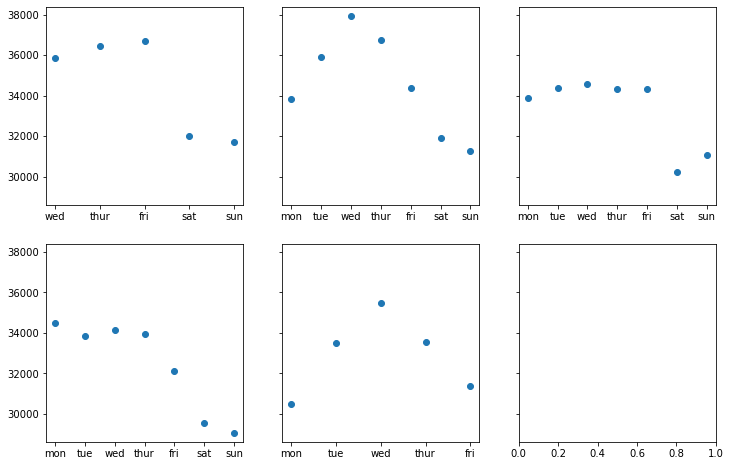

In [37]:
M=file.loc[(file['SETTLEMENT_PERIOD']==39) & (file['SETTLEMENT_DATE'].str.contains('MAY')), :]
T= pd.DataFrame((M['ND']+ M['EMBEDDED_WIND_GENERATION']+ M['EMBEDDED_SOLAR_GENERATION']), columns=['T'])
M=pd.concat([M,T], axis=1).reset_index()
M['SETTLEMENT_DATE']=M['SETTLEMENT_DATE'].str[0:2]
s=['mon','tue','wed','thur','fri','sat','sun']
n=0
m1=M.loc[0:4, :]
m1.loc[:,'SETTLEMENT_DATE']=s[2:]
n+=5
m2=M.loc[n:n+6, :]
m2.loc[:,'SETTLEMENT_DATE']=s
n+=7
m3=M.loc[n:n+6, :]
m3.loc[:,'SETTLEMENT_DATE']=s
n+=7
m4=M.loc[n:n+6, :]
m4.loc[:,'SETTLEMENT_DATE']=s
n+=7
m5=M.loc[n:n+4, :]
m5.loc[:,'SETTLEMENT_DATE']=s[0:5]
fig, ax=plt.subplots(2,3, figsize=(12,8), sharey=True)
ax[0,0].scatter(m1['SETTLEMENT_DATE'],  m1['T'])
ax[0,1].scatter(m2['SETTLEMENT_DATE'],  m2['T'])
ax[0,2].scatter(m3['SETTLEMENT_DATE'],  m3['T'])
ax[1,0].scatter(m4['SETTLEMENT_DATE'],  m4['T'])
ax[1,1].scatter(m5['SETTLEMENT_DATE'],  m5['T'])

### Building a changeable plotter <a class='anchor' id= 'c1s2' ></a> 

I want to make a plotter that takes in various inputs and then outputs a number of plots as defined by this. Already i have found that there are times where I want to plot all the 7 oclock periods throughout a month to see how they change on weekdays and stuff like that. Ideally my function will be able to plot:

* the same time of day for a given period. basically as i did above
* the same time and day over a given period, for example, 7 oclock on a wednesdya for two months. 

before I get started on this I really need to add a bit more information to the data to make it easier to select days (ie, all modays) and the months. 

In [95]:
print(68%6)

2


74       39999
410      40787
746      40264
1082     41593
1418     41414
         ...  
15866    39133
16202    38909
16538    39372
16874    40353
17210    33285
Name: ND, Length: 52, dtype: int64
Int64Index([   74,   410,   746,  1082,  1418,  1754,  2090,  2426,  2762,
             3098,  3434,  3770,  4106,  4440,  4776,  5112,  5448,  5784,
             6120,  6456,  6792,  7128,  7464,  7800,  8136,  8472,  8808,
             9144,  9480,  9816, 10152, 10488, 10824, 11160, 11496, 11832,
            12168, 12504, 12840, 13176, 13512, 13848, 14184, 14522, 14858,
            15194, 15530, 15866, 16202, 16538, 16874, 17210],
           dtype='int64')
       Day SETTLEMENT_DATE  SETTLEMENT_PERIOD     ND    TSD  \
48     wed     02-JAN-2019                  1  24748  26751   
49     wed     02-JAN-2019                  2  25273  27356   
50     wed     02-JAN-2019                  3  25102  27354   
51     wed     02-JAN-2019                  4  24547  26916   
52     wed     02-JAN-

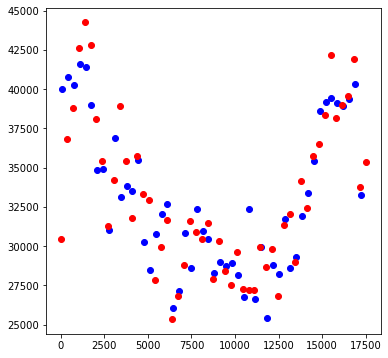

In [116]:
file4=file.copy()
week=['mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun']
days={}
for i in range(0,7):
    days[int(i)]=week[int(i)]
dayfrommonday=1
n=[((i//48)+dayfrommonday)%7 for i in file4.index.tolist()]
Day=pd.DataFrame([days[j] for j in n], columns=['Day'])
file4=pd.concat([Day, file4], axis=1)

#print(file4.head())
fig, ax=plt.subplots( figsize=(6,6))
print(file4.loc[(file4.Day=='wed') & (file4.SETTLEMENT_PERIOD==27), :]['ND'])
print(file2.loc[(file2.Day=='wed') & (file2.SETTLEMENT_PERIOD==27), :].index)
ax.scatter(file4.loc[(file4.Day=='wed') & (file4.SETTLEMENT_PERIOD==27), :].index, file4.loc[(file4.Day=='wed') & (file4.SETTLEMENT_PERIOD==27), :]['ND'], c='b') 
ax.scatter(file4.loc[(file4.Day=='tues') & (file4.SETTLEMENT_PERIOD==27), :].index, file4.loc[(file4.Day=='tues') & (file4.SETTLEMENT_PERIOD==27), :]['ND'], c='r') 
#file2.sample(n = 5, random_state = 1)

In [161]:
s=25
d1='wed'
d2='mon'
o1=file4.loc[(file4.Day==d1) & (file4['SETTLEMENT_PERIOD']==s)]
o2=file4.loc[(file4.Day==d2) & (file4['SETTLEMENT_PERIOD']==s)]
#print(wed.iloc[1, 3])
print(len(o1))
w=[]
for i in range(0,len(o1)):
    if o1.iloc[i, 3]>o2.iloc[i,3]:
        w.append(i)
print(len(w))
#print(len([wed.iloc[i, 3]<tues.iloc[i,3] for i in range(0,len(wed))]))
#print(file4.loc[(file4.Day=='wed') < (file4.Day=='tues'), :])

52
32


# Chapter 2: Adding Variables  <a class='anchor' id='chapter2'></a>

The goal of this chapter is to add some columns to the data that i think add to the important dependent variables i need to take account of before fitting my model. The earliest thoughts I have are to add a measure of bank holidays, sunshine available (to give the system an idea of how much solar energy will be provided, temperature etcetera. )

## Bank Holidays <a class='anchor' id='bankholidays'></a>
This section works on pulling the dates of bank holidays from a boring website and eventually we will add them to the main data, taking into account that bank holidays dont just affect the days themselves but also the rest of the week. 


In [ ]:
year=input('which year')
data='https://www.officeholidays.com/countries/united-kingdom/england/{}'.format(year)
#data='https://www.officeholidays.com/countries/united-kingdom/england/2019'
page = requests.get(data)
page.status_code
soup = bS(page.content, 'html.parser')
tab=soup.find('table', class_ = 'country-table')
items=tab.find_all(attrs={"class": ["country","region"]})
dates=[]
for it in items:
    dates.append(str(it.find('time'))[16:26])
#alternatively 
dates2=[]
for it in items:
    i=it.find('time').contents[0][4:]+'-'+it.find('time').contents[0][0:3].upper()+'-'+year
    dates2.append(i)
print(dates)
print(dates2)
#dates=items.find_all('time')
#print(dates)

In [ ]:
url='https://publicholidays.co.uk/england/2019-dates/'
headers={ 'User_Agent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"}

text=requests.get(url, headers=headers)
text.status_code

# Chapter 3: Preparing data  <a class='anchor' id='chapter3'></a>


## How to deal with time data    <a class='anchor' id='sinusoids'></a>

Something that was troubling me was the fact that although December and January have a really close proximity to one another, they are not related by numbering them from 1-12, in that while january and february a month apart, that same relationship between january and december would not be appreciated in this system. 

Probably more importantly is the relationship between 24:00 at night and one oclock in the morning. These times are right next to one another but the algorithm would not be able to determine that, if they were kept as a 0-48 scale. 

The solution to this is to use a sinusiodal curve, with a $\omega$ of $\frac{2 \pi}{T}$ where T, the time period, is 48 for the daily scale and 365 for the yearly scale. I think it is necessary to match how the energy pattern changes over time for what kinf or curve we use. To explain this I am replotting something from earlier on in the project. 

In [ ]:
fig, (ax1, ax2)=plt.subplots(2,1)
plt.figure(figsize=(20,12))
toplot= file3['ND']+ file3['EMBEDDED_WIND_GENERATION']+ file3['EMBEDDED_SOLAR_GENERATION']
ax1.scatter(file3.index/48, file3['ND'])
ax2.scatter(file3.index/48, toplot)

This is the energy usage at 12 oclock throughout the year and it seems to follow a cos curve quite well with some weird variations that I am attributing to christmas. Now if I applied a cos curve to the time of year column it would follow a similar crve to this. Does that make it easier for the algorithm to group data and provide insight? I think it probably does, and in fact is probably quite important. 

In [ ]:
hours=file2['SETTLEMENT_PERIOD'].unique()
av=[]
for i in hours:
    av.append(file2.loc[file2['SETTLEMENT_PERIOD']==i, :]['ND'].mean())
fig, ax=plt.subplots()
ax.scatter(hours[0:-2], av[0:-2])
#Note I have lopped off two values which are due to the clocks changing

This is taken by averaging the power usage for each half an hour time period across the year. It makes an absolutely horrid graph haha but I think it would look better if this was slightly split up between the summer months. What is quite clear is that there is a connection between the values at the end of the day and the start of the next. it is also clear that a cos graph would not fit this data well at all. I will have to think carefully about what i choose, be it a cos graph a -sin plot or one of these with some offset,  $\delta$. 

Something to consider is that if I do use this method, the times will be bunched in a slightly odd way. This is because a uniform input varying between 0 and 2$\pi$ poduced a curve which is bunched around turns in the curve, around 0 and $\pi$ for a cosine curve adn around $-\frac{\pi}{2}$ and $\frac{\pi}{2}$ for a sin curve, while they are more spread out in period of the curve with a greater $\frac{d}{dx}$. Will have to think about how this will affect my project. 

In [ ]:
def min(a):
    mi=1
    for i in mi:
        if 
        mi+=1